In [3]:
!pip install h2o

In [4]:
!pip install tpot

In [5]:
!pip install flaml

In [6]:
import sklearn
print(sklearn.__version__)

1.2.2


In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [8]:
df = pd.read_csv('/content/drive/MyDrive/label_encoding_standard_scaling_data.csv')
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,1,1.611381,1,2,2,1,1,1,1,1,1,2,0,1,-1.353483,-0.247769,0
1,0,0,0,0,0.468468,1,0,1,0,2,2,0,2,0,0,1,1,0.774066,0.736669,0
2,0,1,1,0,0.223558,1,2,1,0,0,0,0,0,0,0,1,0,0.335602,0.251453,1
3,1,0,0,0,-1.164265,1,0,0,0,0,0,0,0,2,0,1,2,-0.297182,-0.905725,0
4,1,0,0,0,-1.245901,1,0,0,2,0,2,0,0,0,0,0,2,-0.378564,-0.958057,0


In [9]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5976 entries, 0 to 5975
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5976 non-null   int64  
 1   SeniorCitizen     5976 non-null   int64  
 2   Partner           5976 non-null   int64  
 3   Dependents        5976 non-null   int64  
 4   tenure            5976 non-null   float64
 5   PhoneService      5976 non-null   int64  
 6   MultipleLines     5976 non-null   int64  
 7   InternetService   5976 non-null   int64  
 8   OnlineSecurity    5976 non-null   int64  
 9   OnlineBackup      5976 non-null   int64  
 10  DeviceProtection  5976 non-null   int64  
 11  TechSupport       5976 non-null   int64  
 12  StreamingTV       5976 non-null   int64  
 13  StreamingMovies   5976 non-null   int64  
 14  Contract          5976 non-null   int64  
 15  PaperlessBilling  5976 non-null   int64  
 16  PaymentMethod     5976 non-null   int64  


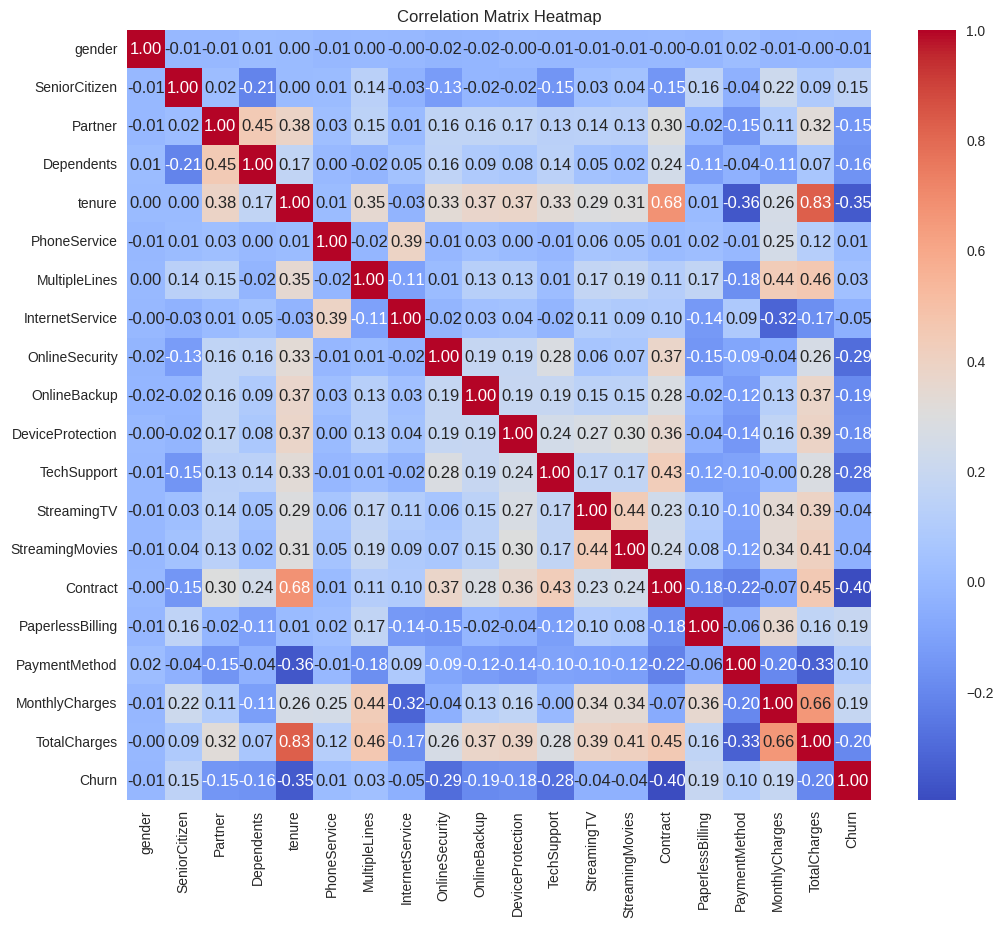

In [11]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

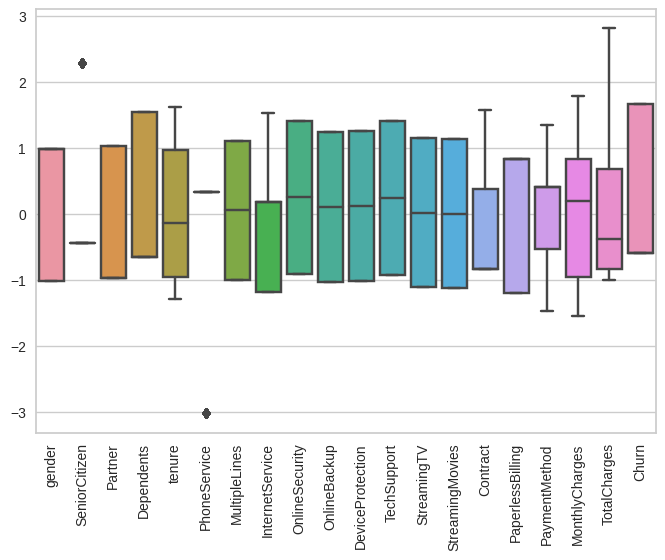

In [12]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

numeric_cols = df.select_dtypes(include=['number']).columns
data_scaled = df.copy()

scaler = StandardScaler()
data_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])

ax = sns.boxplot(data=data_scaled)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

In [13]:
highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)

print(highly_correlated_features)

{'TotalCharges'}


In [14]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

X = df.select_dtypes(include=['number'])
X = X.drop(['Churn'], axis=1)
y = df['Churn']

model = RandomForestClassifier()

rfe = RFE(model, n_features_to_select=1)
X_rfe = rfe.fit_transform(X, y)

selected_features = X.columns[rfe.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['TotalCharges'], dtype='object')


In [15]:
from sklearn.feature_selection import SelectKBest, f_classif

X = df.select_dtypes(include=['number'])
X = X.drop(['Churn'], axis=1)
y = df['Churn']


k = 8
selector = SelectKBest(f_classif, k=k)
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['tenure', 'OnlineSecurity', 'OnlineBackup', 'TechSupport', 'Contract',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')


In [49]:
!pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 55.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 49.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 17.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 69.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 15.1 MB/

In [17]:
from pycaret.classification import *

reg_setup = setup(df, target='Churn', session_id=42, log_experiment=True, experiment_name='regression_experiment')

,Description,Value
0,Session id,42
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(5976, 20)"
4,Transformed data shape,"(5976, 20)"
5,Transformed train set shape,"(4183, 20)"
6,Transformed test set shape,"(1793, 20)"
7,Numeric features,19
8,Preprocess,True
9,Imputation type,simple


2023/12/21 13:56:38 INFO mlflow.tracking.fluent: Experiment with name 'regression_experiment' does not exist. Creating a new experiment.


In [18]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.7982,0.8376,0.5230,0.6493,0.5789,0.4484,0.4532,0.2630
lr,Logistic Regression,0.7973,0.8383,0.5329,0.6426,0.5821,0.4500,0.4537,0.6730
gbc,Gradient Boosting Classifier,0.7973,0.8404,0.4987,0.6565,0.5661,0.4372,0.4446,0.7580
catboost,CatBoost Classifier,0.7954,0.8332,0.5032,0.6486,0.5663,0.4352,0.4415,3.9170
ridge,Ridge Classifier,0.7935,0.0000,0.4825,0.6487,0.5524,0.4223,0.4305,0.0300
lda,Linear Discriminant Analysis,0.7903,0.8305,0.5202,0.6268,0.5678,0.4312,0.4349,0.0410
lightgbm,Light Gradient Boosting Machine,0.7894,0.8224,0.5068,0.6305,0.5609,0.4247,0.4297,1.1650
rf,Random Forest Classifier,0.7858,0.8153,0.4609,0.6357,0.5336,0.3991,0.4083,0.6340
xgboost,Extreme Gradient Boosting,0.7772,0.8063,0.5058,0.5951,0.5465,0.4002,0.4027,0.1310
svm,SVM - Linear Kernel,0.7710,0.0000,0.4068,0.6319,0.4603,0.3346,0.3627,0.0540


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [19]:
rf_model = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7780,0.8145,0.4375,0.6203,0.5131,0.3749,0.3844
1,0.7876,0.8308,0.4865,0.6279,0.5482,0.4123,0.4180
2,0.7757,0.8087,0.3964,0.6197,0.4835,0.3489,0.3632
3,0.8158,0.8489,0.4955,0.7237,0.5882,0.4749,0.4890
4,0.7488,0.7651,0.4324,0.5333,0.4776,0.3146,0.3176
5,0.8038,0.8362,0.4595,0.6986,0.5543,0.4354,0.4511
6,0.7751,0.8183,0.4865,0.5934,0.5347,0.3883,0.3916
7,0.7751,0.8038,0.4505,0.6024,0.5155,0.3730,0.3797
8,0.7967,0.8149,0.4775,0.6625,0.5550,0.4277,0.4373


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [20]:
tuned_rf_model = tune_model(rf_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7924,0.8313,0.4464,0.6667,0.5348,0.4078,0.4214
1,0.7947,0.8461,0.4324,0.6761,0.5275,0.4044,0.4208
2,0.8043,0.8296,0.4595,0.6986,0.5543,0.4357,0.4514
3,0.8110,0.8609,0.4865,0.7105,0.5775,0.4613,0.4750
4,0.7799,0.7959,0.4685,0.6118,0.5306,0.3901,0.3961
5,0.8110,0.8569,0.4865,0.7105,0.5775,0.4613,0.4750
6,0.7943,0.8393,0.4775,0.6543,0.5521,0.4227,0.4316
7,0.8230,0.8394,0.4865,0.7606,0.5934,0.4872,0.5070
8,0.8086,0.8507,0.5225,0.6824,0.5918,0.4697,0.4768


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [21]:
evaluate_model(tuned_rf_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [22]:
predictions = predict_model(tuned_rf_model, data=df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8312,0.8943,0.5406,0.7540,0.6297,0.5242,0.5363


In [23]:
save_model(tuned_rf_model, 'forest_regression_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['gender', 'SeniorCitizen',
                                              'Partner', 'Dependents', 'tenure',
                                              'PhoneService', 'MultipleLines',
                                              'InternetService',
                                              'OnlineSecurity', 'OnlineBackup',
                                              'DeviceProtection', 'TechSupport',
                                              'StreamingTV', 'StreamingMovies',
                                              'Contract', 'PaperlessBilling',
                                              'PaymentMe...
                 ('trained_model',
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight={}, criterion='gini',
          

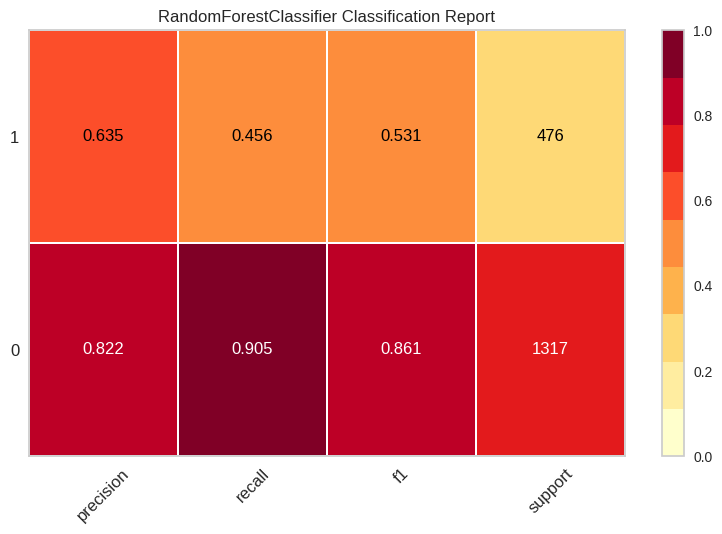

In [29]:
plot_model(rf_model, plot='class_report')

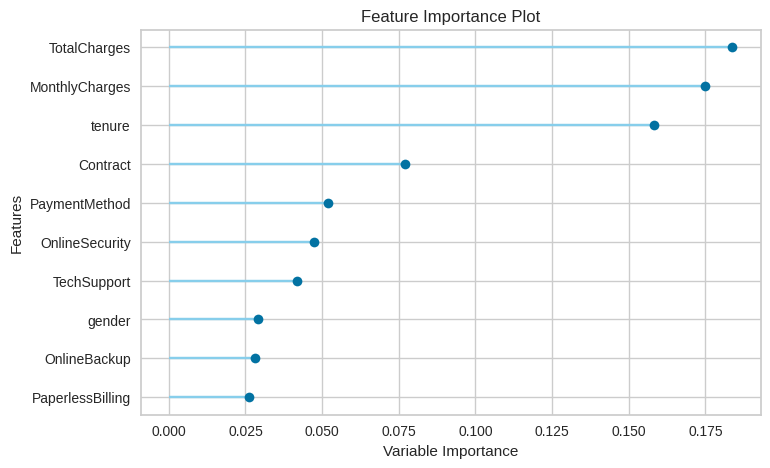

In [47]:
plot_model(rf_model, plot='feature')

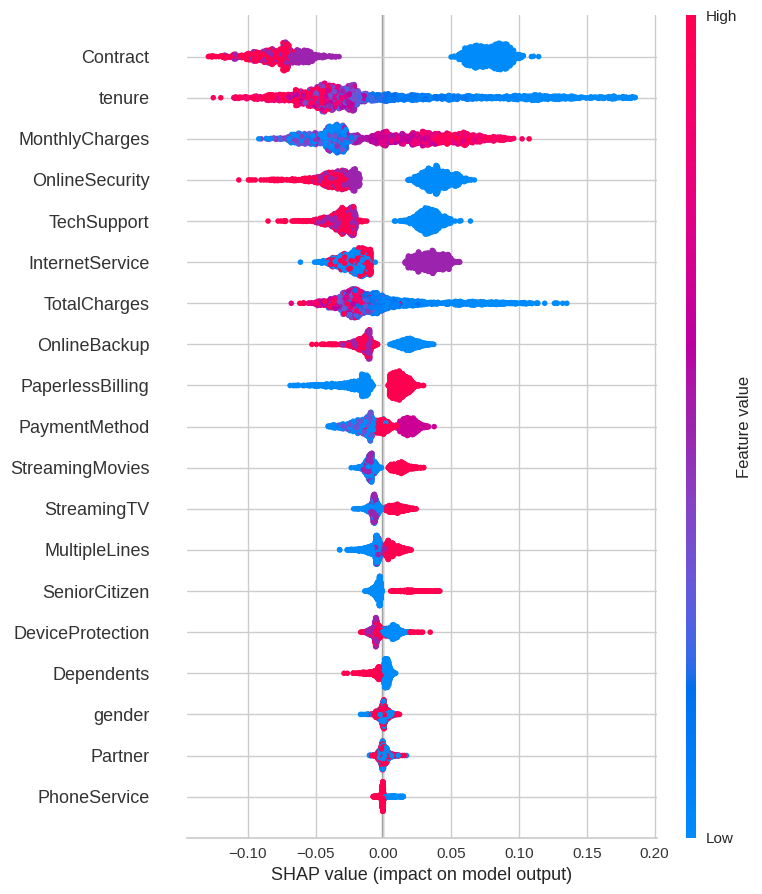

In [30]:
interpret_model(tuned_rf_model)


In [31]:
final_rf_model = finalize_model(tuned_rf_model)

In [32]:
save_model(final_rf_model, 'final_forest_regression_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['gender', 'SeniorCitizen',
                                              'Partner', 'Dependents', 'tenure',
                                              'PhoneService', 'MultipleLines',
                                              'InternetService',
                                              'OnlineSecurity', 'OnlineBackup',
                                              'DeviceProtection', 'TechSupport',
                                              'StreamingTV', 'StreamingMovies',
                                              'Contract', 'PaperlessBilling',
                                              'PaymentMe...
                 ('actual_estimator',
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight={}, criterion='gini',
       

In [33]:
qda_model = create_model('qda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7637,0.8434,0.7768,0.5404,0.6374,0.4704,0.4874
1,0.7589,0.8238,0.6847,0.5352,0.6008,0.4318,0.4386
2,0.7685,0.8230,0.7027,0.5493,0.6166,0.4543,0.4614
3,0.7584,0.8360,0.7658,0.5312,0.6273,0.4571,0.4738
4,0.7297,0.8035,0.6757,0.4934,0.5703,0.3800,0.3900
5,0.7584,0.8407,0.7477,0.5321,0.6217,0.4515,0.4656
6,0.7488,0.8146,0.7117,0.5197,0.6008,0.4239,0.4351
7,0.7297,0.8331,0.7568,0.4941,0.5979,0.4075,0.4285
8,0.7990,0.8411,0.7658,0.5944,0.6693,0.5282,0.5370


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [34]:
tuned_qda_model = tune_model(qda_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7613,0.8252,0.6964,0.5417,0.6094,0.4414,0.4486
1,0.7971,0.8360,0.6667,0.6066,0.6352,0.4951,0.4962
2,0.7780,0.8215,0.6486,0.5714,0.6076,0.4537,0.4555
3,0.7560,0.8267,0.6667,0.5324,0.5920,0.4210,0.4265
4,0.7368,0.8096,0.6577,0.5034,0.5703,0.3854,0.3926
5,0.7847,0.8385,0.6757,0.5814,0.6250,0.4752,0.4778
6,0.7512,0.8142,0.6216,0.5267,0.5702,0.3968,0.3995
7,0.7727,0.8315,0.7477,0.5533,0.6360,0.4761,0.4875
8,0.7895,0.8404,0.6937,0.5878,0.6364,0.4896,0.4930


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [35]:
evaluate_model(tuned_qda_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [36]:
predictions_qda = predict_model(tuned_qda_model, data=df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Quadratic Discriminant Analysis,0.7758,0.8334,0.6786,0.5648,0.6165,0.4599,0.4638


In [37]:
save_model(tuned_qda_model, 'quadratic_discriminant_analysis_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['gender', 'SeniorCitizen',
                                              'Partner', 'Dependents', 'tenure',
                                              'PhoneService', 'MultipleLines',
                                              'InternetService',
                                              'OnlineSecurity', 'OnlineBackup',
                                              'DeviceProtection', 'TechSupport',
                                              'StreamingTV', 'StreamingMovies',
                                              'Contract', 'PaperlessBilling',
                                              'PaymentMe...
                 ('categorical_imputer',
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_indicator=False,
     

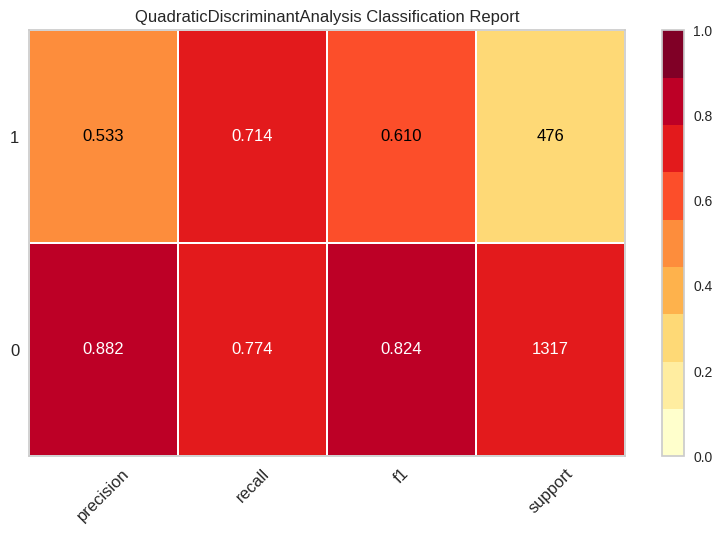

In [38]:
plot_model(qda_model, plot='class_report')

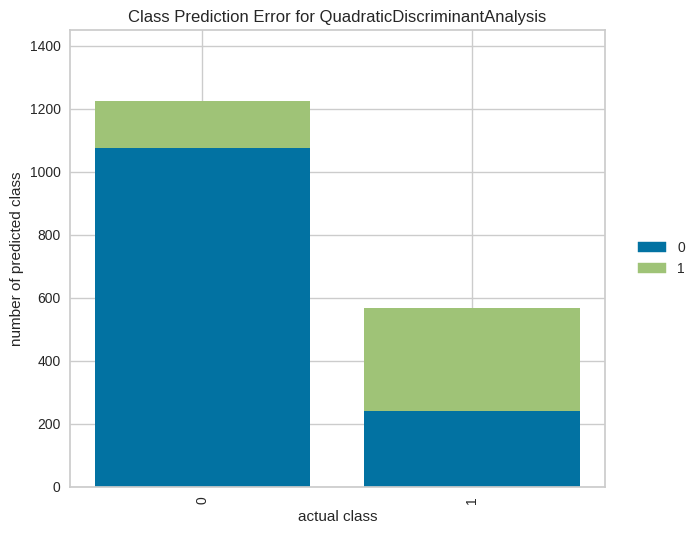

In [42]:
plot_model(tuned_qda_model, plot='error')

In [45]:
final_qda_model = finalize_model(tuned_qda_model)

In [46]:
save_model(final_qda_model, 'quadratic_discriminant_analysis_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['gender', 'SeniorCitizen',
                                              'Partner', 'Dependents', 'tenure',
                                              'PhoneService', 'MultipleLines',
                                              'InternetService',
                                              'OnlineSecurity', 'OnlineBackup',
                                              'DeviceProtection', 'TechSupport',
                                              'StreamingTV', 'StreamingMovies',
                                              'Contract', 'PaperlessBilling',
                                              'PaymentMe...
                 ('categorical_imputer',
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_indicator=False,
     